In [98]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt

# get the data from h5py
import h5py

# for plotting consistently with abu_profile
from nugridpy import utils as u

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [99]:
# set path to the sub-time step directory (10)
path_sub = '/user/ast501/dstephens/mppnp/diffusion_changes/diffusion_jones/mppnp_subtime_10/H5_out/'
path = '/user/ast501/dstephens/mppnp/diffusion_changes/diffusion_jones/mppnp_subtime_0/H5_out/'

# read in the data
star_pp_sub = mp.se(path_sub,rewrite=True)
star_pp = mp.se(path,rewrite=True)
file_0 = h5py.File(path + 'M2.00Z0.020.0053501.out.h5')
file_10 = h5py.File(path_sub + 'M2.00Z0.020.0053621.out.h5')

Searching files, please wait.......
Writing preprocessor files
M2.00Z0.020.0053621.out.h5
File search complete.
Closing plot_tools
Searching files, please wait.......
Writing preprocessor files
M2.00Z0.020.0053001.out.h5
Closing plot_toolsM2.00Z0.020.0053501.out.h5

File search complete.


In [107]:
# read in for a particular file the iso massf
model = 53650
iso_0 = star_pp.get(model,'iso_massf')
iso_10 = star_pp.get(model,'iso_massf')

 reading ['iso_massf']...100%

<IPython.core.display.Javascript object>


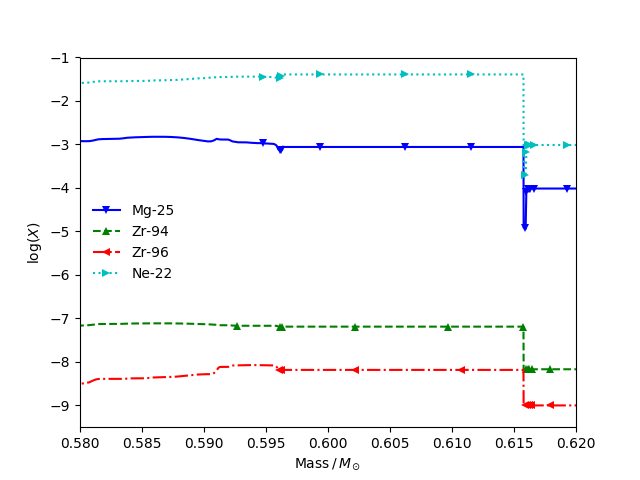

 reading ['iso_massf']...100%

(0.58, 0.62)

In [87]:
# shapes are same, make a plot of each for a set of species rapidly changing
species = ['Mg-25','Zr-94','Zr-96','Ne-22']

plt.figure(1)
star_pp.abu_profile(ifig=1,fname=model,isos=species,logy=True)
plt.xlim([0.58,0.62])

<IPython.core.display.Javascript object>


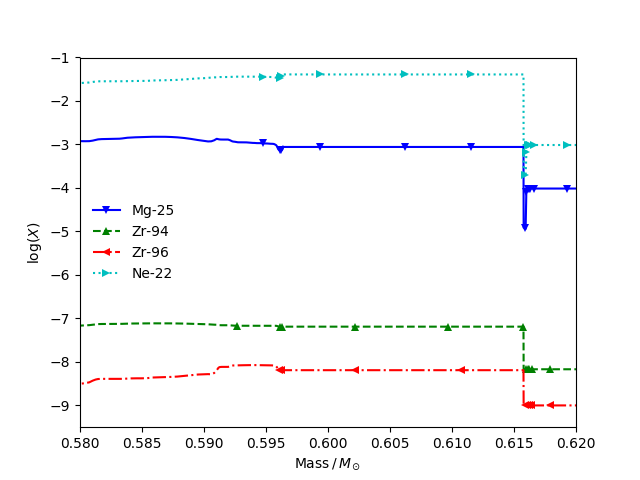

 reading ['iso_massf']...100%

(0.58, 0.62)

In [88]:
plt.figure(2)
star_pp_sub.abu_profile(ifig=2,fname=model,isos=species,logy=True)
plt.xlim([0.58,0.62])

## Make Ratios and Differences: Nugridse

In [89]:
star_pp_sub.se.get(53650,'cycle')

 reading ['cycle']...100%

53650

In [108]:
# make a plot of abundances but take the difference between the mass fractions
mass = star_pp.get(model,'mass')

iso_ratio = iso_0 - (iso_10)

# get the isotope key
iso_keys = star_pp.se.isotopes

 reading ['mass']...100%

The std and mean of the difference in iso species when read with nugrdpy.nugridse is zero and so they are the exact same data arrays

In [109]:
# print the std of the difference in the data
print(np.std(iso_ratio))
print(np.mean(iso_ratio))
print(np.array_equal(iso_0,iso_10))

0.0
0.0
True


## Make Ratios and Differences: H5 Files

In [103]:
# look at the shape of the data AT model 53650
print(file_0['cycle0000053650']['SE_DATASET'].shape)
print(file_10['cycle0000053650']['SE_DATASET'].shape)

# check the difference in their masses
group_0 = file_0['cycle0000053650']
group_10 = file_10['cycle0000053650']

print('Is the mass the same?',np.mean(group_0['SE_DATASET']['mass'] - group_10['SE_DATASET']['mass']))

(2046,)
(2046,)
Is the mass the same? 0.0


In [104]:
# are deltat the same? They should be different by factor of 10
print(list(group_0.attrs.items()))
print(list(group_10.attrs.items()))

[('shellnb', array([2046], dtype=int32)), ('age', array([  4.47439293e+16])), ('deltat', array([ 394910.15940781])), ('total_mass', array([ 2.])), ('cycle', array([53650], dtype=int32))]
[('shellnb', array([2046], dtype=int32)), ('age', array([  4.47439293e+16])), ('deltat', array([ 39491.01594078])), ('total_mass', array([ 2.])), ('cycle', array([53650], dtype=int32))]


In [105]:
# try grabbing data of the iso massf
iso_data0 = group_0['SE_DATASET']['iso_massf']
iso_data10 = group_10['SE_DATASET']['iso_massf']

In [106]:
iso_ratio_h5 = iso_data0 - iso_data10
print(np.std(iso_ratio_h5))
print(np.mean(iso_ratio_h5))
print(np.array_equal(iso_data0,iso_data10))

1.99836435094e-06
3.94749826135e-11
False
